# Importing Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# Importing and Cleaning Federal Reserve Data

In [2]:
#read in federal reserve csv files using list comprehension and for loop
fed_files = ["C:/Users/Mathew/Documents/Python Project/data/MORTGAGE30US.csv", 
             "C:/Users/Mathew/Documents/Python Project/data/RRVRUSQ156N.csv", 
             "C:/Users/Mathew/Documents/Python Project/data/CPIAUCSL.csv"]
#ensuring date is index column and parsed to date (instead of string)
dfs = [pd.read_csv(f, parse_dates = True, index_col = 0) for f in fed_files]

In [3]:
#showing weekly mortgage interest rates
dfs[0]

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2022-12-29,6.42
2023-01-05,6.48
2023-01-12,6.33


In [4]:
#showing quarterly rental vacancy rates
dfs[1]

,RRVRUSQ156N
DATE,
1956-01-01,6.2
1956-04-01,5.9
1956-07-01,6.3
1956-10-01,5.8
1957-01-01,5.3
...,...
2021-07-01,5.8
2021-10-01,5.6
2022-01-01,5.8


In [5]:
#showing weekly mortgage interest rates
dfs[2]

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2022-08-01,295.620
2022-09-01,296.761
2022-10-01,298.062


In [6]:
#combining the three seperate dataframes above into one
fed_data = pd.concat(dfs, axis = 1)

In [7]:
#combined federal reserve data
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95
...,...,...,...
2022-12-29,6.42,NaN,NaN
2023-01-05,6.48,NaN,NaN
2023-01-12,6.33,NaN,NaN


In [8]:
fed_data.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-04-01,NaN,5.6,288.663
2022-04-07,4.72,NaN,NaN
2022-04-14,5.00,NaN,NaN
2022-04-21,5.11,NaN,NaN
2022-04-28,5.10,NaN,NaN
2022-05-01,NaN,NaN,291.474
2022-05-05,5.27,NaN,NaN
2022-05-12,5.30,NaN,NaN
2022-05-19,5.25,NaN,NaN


In [9]:
#forward filling to remove NaN values (due to different timeframes)
fed_data = fed_data.ffill()

In [10]:
fed_data.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-04-01,4.67,5.6,288.663
2022-04-07,4.72,5.6,288.663
2022-04-14,5.00,5.6,288.663
2022-04-21,5.11,5.6,288.663
2022-04-28,5.10,5.6,288.663
2022-05-01,5.10,5.6,291.474
2022-05-05,5.27,5.6,291.474
2022-05-12,5.30,5.6,291.474
2022-05-19,5.25,5.6,291.474


# Importing and Cleaning Zillow Data

In [11]:
#read in all csv files using list comprehension and for loop
zillow_files = ["C:/Users/Mathew/Documents/Python Project/data/Metro_median_sale_price_uc_sfrcondo_week.csv", 
                "C:/Users/Mathew/Documents/Python Project/data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"]

dfs = [pd.read_csv(f) for f in zillow_files]

In [12]:
# showing zillow home value index dataframe
dfs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-10-08,2022-10-15,2022-10-22,2022-10-29,2022-11-05,2022-11-12,2022-11-19,2022-11-26,2022-12-03,2022-12-10
0,102001,0,United States,country,NaN,183000.0,179900.0,180000.0,175000.0,182000.0,...,340000.0,339900.0,336000.0,330000.0,330000.0,330000.0,331000.0,325000.0,326000.0,325000.0
1,394913,1,"New York, NY",msa,NY,400000.0,410000.0,412740.0,410000.0,390000.0,...,560000.0,540000.0,540000.0,525000.0,542000.0,520000.0,535000.0,531000.0,525500.0,540000.0
2,753899,2,"Los Angeles, CA",msa,CA,475000.0,501500.0,520000.0,523250.0,489000.0,...,860000.0,850000.0,875000.0,830000.0,870000.0,835000.0,855000.0,850000.0,825000.0,837000.0
3,394463,3,"Chicago, IL",msa,IL,238000.0,236000.0,235000.0,245000.0,245000.0,...,292500.0,278750.0,275000.0,268000.0,285000.0,282000.0,275000.0,265000.0,275000.0,277000.0
4,394514,4,"Dallas, TX",msa,TX,133250.0,137790.0,130500.0,136000.0,139500.0,...,390000.0,390500.0,380000.0,380000.0,385000.0,375000.0,375000.0,359000.0,374200.0,365000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,394539,237,"Dover, DE",msa,DE,NaN,NaN,NaN,NaN,NaN,...,300000.0,310000.0,347500.0,275000.0,323950.0,307567.0,335000.0,320000.0,285000.0,274421.0
58,394710,271,"Jackson, MI",msa,MI,NaN,NaN,NaN,NaN,NaN,...,178450.0,154000.0,160000.0,159950.0,152000.0,140000.0,152450.0,141100.0,180000.0,200000.0
59,394453,272,"Chambersburg, PA",msa,PA,NaN,NaN,NaN,NaN,NaN,...,227450.0,237500.0,225500.0,252400.0,232450.0,235000.0,250500.0,238250.0,225000.0,260000.0
60,395193,293,"Vineland, NJ",msa,NJ,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202500.0,190000.0,236950.0


In [13]:
# display only the United States row and the dates in the dataframes
dfs = [pd.DataFrame(df.iloc[0, 5:]) for df in dfs]

In [14]:
dfs[0]

,0
2008-02-02,183000.0
2008-02-09,179900.0
2008-02-16,180000.0
2008-02-23,175000.0
2008-03-01,182000.0
...,...
2022-11-12,330000.0
2022-11-19,331000.0
2022-11-26,325000.0
2022-12-03,326000.0


In [15]:
# median sales price for US homes (first 5 columns filtered out, only United States row)
dfs[1]

,0
1996-01-31,109213.027779
1996-02-29,109043.604995
1996-03-31,109103.469598
1996-04-30,109311.355334
1996-05-31,109560.202264
...,...
2022-08-31,357852.9008
2022-09-30,357920.460226
2022-10-31,358287.131874
2022-11-30,357598.090264


# Merging Federal Reserve and Zillow Data

In [16]:
# create month column to join dataframes (common column)
for df in dfs:
    # convert string to date
    df.index = pd.to_datetime(df.index)
    # takes date and index's to month
    df["month"] = df.index.to_period("M")

In [17]:
dfs[0]

,0,month
2008-02-02,183000.0,2008-02
2008-02-09,179900.0,2008-02
2008-02-16,180000.0,2008-02
2008-02-23,175000.0,2008-02
2008-03-01,182000.0,2008-03
...,...,...
2022-11-12,330000.0,2022-11
2022-11-19,331000.0,2022-11
2022-11-26,325000.0,2022-11
2022-12-03,326000.0,2022-12


In [18]:
dfs[1]

,0,month
1996-01-31,109213.027779,1996-01
1996-02-29,109043.604995,1996-02
1996-03-31,109103.469598,1996-03
1996-04-30,109311.355334,1996-04
1996-05-31,109560.202264,1996-05
...,...,...
2022-08-31,357852.9008,2022-08
2022-09-30,357920.460226,2022-09
2022-10-31,358287.131874,2022-10
2022-11-30,357598.090264,2022-11


In [19]:
# combine both dataframes
price_data = dfs[0].merge(dfs[1], on = "month")

In [20]:
# ensures date is index
price_data.index = dfs[0].index

In [21]:
price_data

,0_x,month,0_y
2008-02-02,183000.0,2008-02,207974.663267
2008-02-09,179900.0,2008-02,207974.663267
2008-02-16,180000.0,2008-02,207974.663267
2008-02-23,175000.0,2008-02,207974.663267
2008-03-01,182000.0,2008-03,206540.82538
...,...,...,...
2022-11-12,330000.0,2022-11,357598.090264
2022-11-19,331000.0,2022-11,357598.090264
2022-11-26,325000.0,2022-11,357598.090264
2022-12-03,326000.0,2022-12,356819.079508


In [22]:
#remove month column, rename 0_x and 0_y columns
del price_data["month"]
price_data.columns = ["price", "value"]

In [23]:
price_data

,price,value
2008-02-02,183000.0,207974.663267
2008-02-09,179900.0,207974.663267
2008-02-16,180000.0,207974.663267
2008-02-23,175000.0,207974.663267
2008-03-01,182000.0,206540.82538
...,...,...
2022-11-12,330000.0,357598.090264
2022-11-19,331000.0,357598.090264
2022-11-26,325000.0,357598.090264
2022-12-03,326000.0,356819.079508


In [24]:
#remove missing values
fed_data = fed_data.dropna()

In [25]:
fed_data.tail(20)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-09-29,6.70,6.0,296.761
2022-10-01,6.70,6.0,298.062
2022-10-06,6.66,6.0,298.062
2022-10-13,6.92,6.0,298.062
2022-10-20,6.94,6.0,298.062
2022-10-27,7.08,6.0,298.062
2022-11-01,7.08,6.0,298.349
2022-11-03,6.95,6.0,298.349
2022-11-10,7.08,6.0,298.349


In [26]:
#add two days to federal reserve data to align dates to zillow data
fed_data.index = fed_data.index + timedelta(days = 2)

In [27]:
fed_data.tail(20)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-10-01,6.70,6.0,296.761
2022-10-03,6.70,6.0,298.062
2022-10-08,6.66,6.0,298.062
2022-10-15,6.92,6.0,298.062
2022-10-22,6.94,6.0,298.062
2022-10-29,7.08,6.0,298.062
2022-11-03,7.08,6.0,298.349
2022-11-05,6.95,6.0,298.349
2022-11-12,7.08,6.0,298.349


In [28]:
#combining the federal reserve and zillow data into one dataframe based on Date column
price_data = fed_data.merge(price_data, left_index = True, right_index = True)

In [29]:
price_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL,price,value
2008-02-02,5.68,10.1,212.174,183000.0,207974.663267
2008-02-09,5.67,10.1,212.687,179900.0,207974.663267
2008-02-16,5.72,10.1,212.687,180000.0,207974.663267
2008-02-23,6.04,10.1,212.687,175000.0,207974.663267
2008-03-01,6.24,10.1,212.687,182000.0,206540.82538
...,...,...,...,...,...
2022-11-05,6.95,6.0,298.349,330000.0,357598.090264
2022-11-12,7.08,6.0,298.349,330000.0,357598.090264
2022-11-19,6.61,6.0,298.349,331000.0,357598.090264
2022-12-03,6.49,6.0,298.112,326000.0,356819.079508


In [30]:
#renaming MORTGAGE30US, RRVRUSQ156N, and CPIAUCSL columns
price_data.columns = ("interest", "vacancy", "cpi", "price", "value")

In [31]:
price_data

,interest,vacancy,cpi,price,value
2008-02-02,5.68,10.1,212.174,183000.0,207974.663267
2008-02-09,5.67,10.1,212.687,179900.0,207974.663267
2008-02-16,5.72,10.1,212.687,180000.0,207974.663267
2008-02-23,6.04,10.1,212.687,175000.0,207974.663267
2008-03-01,6.24,10.1,212.687,182000.0,206540.82538
...,...,...,...,...,...
2022-11-05,6.95,6.0,298.349,330000.0,357598.090264
2022-11-12,7.08,6.0,298.349,330000.0,357598.090264
2022-11-19,6.61,6.0,298.349,331000.0,357598.090264
2022-12-03,6.49,6.0,298.112,326000.0,356819.079508


# Data Exploration

<AxesSubplot:>

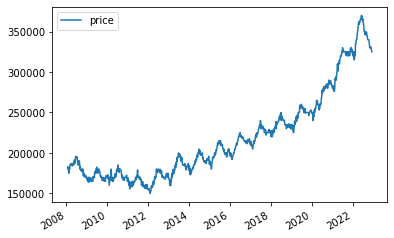

In [32]:
#plot house prices in the US over time
price_data.plot.line(y = "price", use_index = True)

In [33]:
#create column for adjusted price based on inflation
price_data["adj_price"] = price_data["price"] / price_data["cpi"] * 100

<AxesSubplot:>

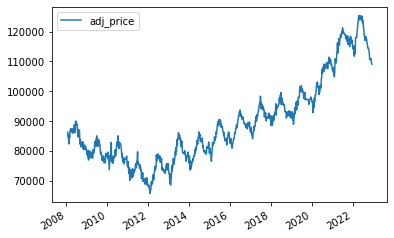

In [34]:
#plot house prices in the US over time (adjusted for inflation)
price_data.plot.line(y = "adj_price", use_index = True)

In [35]:
#create column for adjusted value of average house price
price_data["adj_value"] = price_data["value"] / price_data["cpi"] * 100

<AxesSubplot:>

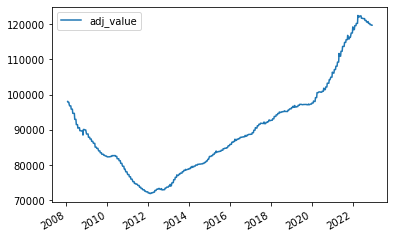

In [36]:
#plot average US house price over time (adjusted for inflation)
price_data.plot.line(y = "adj_value", use_index = True)

# Preparing data for model

In [37]:
#create quarterly price of a house for next quarter
price_data["next_quarter"] = price_data["adj_price"].shift(-13)

In [38]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,183000.0,207974.663267,86249.964652,98020.80522,86428.013828
2008-02-09,5.67,10.1,212.687,179900.0,207974.663267,84584.389267,97784.379519,85963.347087
2008-02-16,5.72,10.1,212.687,180000.0,207974.663267,84631.406715,97784.379519,87125.01394
2008-02-23,6.04,10.1,212.687,175000.0,207974.663267,82280.534306,97784.379519,86428.013828
2008-03-01,6.24,10.1,212.687,182000.0,206540.82538,85571.755679,97110.225533,88751.347534
...,...,...,...,...,...,...,...,...
2022-11-05,6.95,6.0,298.349,330000.0,357598.090264,110608.716637,119858.987382,NaN
2022-11-12,7.08,6.0,298.349,330000.0,357598.090264,110608.716637,119858.987382,NaN
2022-11-19,6.61,6.0,298.349,331000.0,357598.090264,110943.894566,119858.987382,NaN
2022-12-03,6.49,6.0,298.112,326000.0,356819.079508,109354.873336,119692.96087,NaN


In [39]:
#drop NaN values from next quarter column for model training purposes
price_data.dropna(inplace = True)

In [40]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,183000.0,207974.663267,86249.964652,98020.80522,86428.013828
2008-02-09,5.67,10.1,212.687,179900.0,207974.663267,84584.389267,97784.379519,85963.347087
2008-02-16,5.72,10.1,212.687,180000.0,207974.663267,84631.406715,97784.379519,87125.01394
2008-02-23,6.04,10.1,212.687,175000.0,207974.663267,82280.534306,97784.379519,86428.013828
2008-03-01,6.24,10.1,212.687,182000.0,206540.82538,85571.755679,97110.225533,88751.347534
...,...,...,...,...,...,...,...,...
2022-08-06,4.99,6.0,295.620,346000.0,357852.9008,117042.148704,121051.654421,110608.716637
2022-08-13,5.22,6.0,295.620,347990.0,357852.9008,117715.310196,121051.654421,110608.716637
2022-08-20,5.13,6.0,295.620,349950.0,357852.9008,118378.323523,121051.654421,110943.894566
2022-08-27,5.55,6.0,295.620,346000.0,357852.9008,117042.148704,121051.654421,109354.873336


In [41]:
#create column to see if prices go up or down in the next quarter compared to last quarter
price_data["change"] = (price_data["next_quarter"] > price_data["adj_price"]).astype(int)

In [42]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change
2008-02-02,5.68,10.1,212.174,183000.0,207974.663267,86249.964652,98020.80522,86428.013828,1
2008-02-09,5.67,10.1,212.687,179900.0,207974.663267,84584.389267,97784.379519,85963.347087,1
2008-02-16,5.72,10.1,212.687,180000.0,207974.663267,84631.406715,97784.379519,87125.01394,1
2008-02-23,6.04,10.1,212.687,175000.0,207974.663267,82280.534306,97784.379519,86428.013828,1
2008-03-01,6.24,10.1,212.687,182000.0,206540.82538,85571.755679,97110.225533,88751.347534,1
...,...,...,...,...,...,...,...,...,...
2022-08-06,4.99,6.0,295.620,346000.0,357852.9008,117042.148704,121051.654421,110608.716637,0
2022-08-13,5.22,6.0,295.620,347990.0,357852.9008,117715.310196,121051.654421,110608.716637,0
2022-08-20,5.13,6.0,295.620,349950.0,357852.9008,118378.323523,121051.654421,110943.894566,0
2022-08-27,5.55,6.0,295.620,346000.0,357852.9008,117042.148704,121051.654421,109354.873336,0


In [43]:
#seeing if change column is balanced (0 = price was lower, 1 = price was higher)
price_data["change"].value_counts()

0    373
1    370
Name: change, dtype: int64

In [44]:
#creating a list of columns used to predict average quarterly house price
predictors = ["interest", "vacancy", "adj_price", "adj_value"]
target = "change"

# Creating the model

In [45]:
#5 years of data
START = 260
#52 weeks per year
STEP = 52

#function takes in a training set, test set, set of predictors (columns), and target (column) and return predictions
def predict(train, test, predictors, target):
    #creating a random forest model, ensuring that nodes don't split too deep (overfitting) and same number sequence used
    rf = RandomForestClassifier(min_samples_split = 10, random_state = 1)
    #train the model using training predictors and target
    rf.fit(train[predictors], train[target])
    #generate predictions using test set
    preds = rf.predict(test[predictors])
    return preds
#function takes data from previous 5 years to predict next year, using predictor and target columns
def backtest(data, predictors, target):
    #create a list to append all prediction sets to
    all_preds = []
    #start with 5 years of data, then predict next year
    for i in range(START, data.shape[0], STEP):
        # split up training (everything before i) and test (year following i) data 
        train = price_data.iloc[:i]
        test = price_data.iloc[i:(i + STEP)]
        #generate predictions
        all_preds.append(predict(train, test, predictors, target))
    #combine list of predictions arrays into one big array
    preds = np.concatenate(all_preds)
    #return predictions and accuracy score (actual to predicted values)
    return preds, accuracy_score(data.iloc[START:][target], preds)

In [46]:
#run backtest
preds, accuracy = backtest(price_data, predictors, target)

# Testing the model

In [47]:
#model is approximately 57% accurate
accuracy

0.5734989648033126

# Adding additional variables to the model

In [48]:
#add additional information regarding trend in house prices (average predictors value per year)
yearly = price_data.rolling(52, min_periods = 1).mean()

In [49]:
#2022-09-03 contains average values for predictors in 2022
yearly

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change
2008-02-02,5.680000,10.100000,212.174000,183000.000000,207974.663267,86249.964652,98020.805220,86428.013828,1.000000
2008-02-09,5.675000,10.100000,212.430500,181450.000000,207974.663267,85417.176959,97902.592369,86195.680458,1.000000
2008-02-16,5.690000,10.100000,212.516000,180966.666667,207974.663267,85155.253545,97863.188086,86505.458285,1.000000
2008-02-23,5.777500,10.100000,212.558750,179475.000000,207974.663267,84436.573735,97843.485944,86486.097171,1.000000
2008-03-01,5.870000,10.100000,212.584400,179980.000000,207687.895690,84663.610124,97696.833862,86939.147244,1.000000
...,...,...,...,...,...,...,...,...,...
2022-08-06,3.988654,5.726923,284.164462,338936.538462,338226.425164,119217.882748,118955.073886,118424.969401,0.365385
2022-08-13,4.035192,5.730769,284.615154,339378.653846,339158.761083,119185.397935,119097.170932,118292.397790,0.365385
2022-08-20,4.080577,5.734615,285.048385,339858.461538,340011.138326,119173.298119,119217.256556,118216.485073,0.365385
2022-08-27,4.132115,5.738462,285.481615,340262.307692,340863.515570,119135.502633,119337.342179,118041.659422,0.365385


In [50]:
#find ratio between current value for predictors versus previous year
yearly_ratios = [p + "_year" for p in predictors]
price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]

In [51]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change,interest_year,vacancy_year,adj_price_year,adj_value_year
2008-02-02,5.68,10.1,212.174,183000.0,207974.663267,86249.964652,98020.80522,86428.013828,1,1.000000,1.000000,1.0,1.0
2008-02-09,5.67,10.1,212.687,179900.0,207974.663267,84584.389267,97784.379519,85963.347087,1,0.999119,1.000000,0.99025,0.998793
2008-02-16,5.72,10.1,212.687,180000.0,207974.663267,84631.406715,97784.379519,87125.01394,1,1.005272,1.000000,0.993848,0.999195
2008-02-23,6.04,10.1,212.687,175000.0,207974.663267,82280.534306,97784.379519,86428.013828,1,1.045435,1.000000,0.974466,0.999396
2008-03-01,6.24,10.1,212.687,182000.0,206540.82538,85571.755679,97110.225533,88751.347534,1,1.063032,1.000000,1.010727,0.993996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-06,4.99,6.0,295.620,346000.0,357852.9008,117042.148704,121051.654421,110608.716637,0,1.251049,1.047683,0.98175,1.017625
2022-08-13,5.22,6.0,295.620,347990.0,357852.9008,117715.310196,121051.654421,110608.716637,0,1.293619,1.046980,0.987666,1.016411
2022-08-20,5.13,6.0,295.620,349950.0,357852.9008,118378.323523,121051.654421,110943.894566,0,1.257175,1.046278,0.993329,1.015387
2022-08-27,5.55,6.0,295.620,346000.0,357852.9008,117042.148704,121051.654421,109354.873336,0,1.343138,1.045576,0.982429,1.014365


# Retesting the model

In [52]:
#test accuracy with yearly ratios as new predictors
preds, accuracy = backtest(price_data, predictors + yearly_ratios, target)

In [53]:
#model is now approximately 66% accurate, a 9% improvement
accuracy

0.660455486542443

# Data visualization

In [54]:
#comparing predicted to actual values (true if they match, false if they don't match)
pred_match = (preds == price_data[target].iloc[START:])

In [55]:
#color coding match vs no match
pred_match[pred_match == True] = "green"
pred_match[pred_match == False] = "red"

<AxesSubplot:xlabel='index', ylabel='adj_price'>

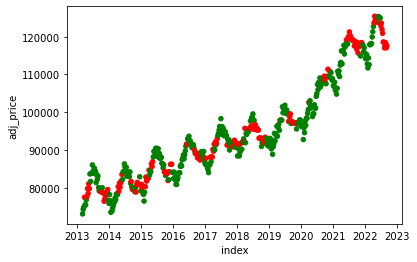

In [56]:
#copying actual values
plot_data = price_data.iloc[START:].copy()
#plot showing whether predictions were correct (matching the actual) or incorrect (not matching the actual)
plot_data.reset_index().plot.scatter(x = "index", y = "adj_price", color = pred_match)

# Determing which columns are most important for model

In [57]:
#reusing previous model
rf = RandomForestClassifier(min_samples_split = 10, random_state = 1)
#train the model across all data
rf.fit(price_data[predictors], price_data[target])
#determing which columns are most important for random forest model
result = permutation_importance(rf, price_data[predictors], price_data[target], n_repeats = 10, random_state = 1)

In [58]:
#how important each column was to the model (higher number = more important)
result["importances_mean"]

array([0.12166891, 0.15881561, 0.29502019, 0.3230148 ])

In [59]:
#column names
predictors

['interest', 'vacancy', 'adj_price', 'adj_value']